# Caso 4: selección y programación de proyectos II

---
## Maestría en Inteligencia Analítica para la Toma de Decisiones

* **Profesor**:
    * *Andrés Medaglia*
* **Asistentes**:
    * *Ariel Rojas*
    * *Carlos Arroyo*

## Instrucciones generales

El primer paso antes de resolver este laboratorio es leer y entender el **enunciado del caso**. Una vez tengas claro el caso, te explicamos la estructura de este laboratorio (los demás laboratorios siguen una estructura similar).

Este laboratorio tiene las siguientes secciones:
* **Formulación**: un breve resumen del modelo con notación matemática y descripción de sus componentes
* **Importación de librerías**
* **Creación de parámetros**
* **Modelado**: aquí implementamos el modelo visto en la formulación (aquí encontrarás por lo general celdas de código que debes completar, ¡nosotros te guiaremos en el proceso!)
* **Reporte de resultados**: esta sección nos muestra las soluciones encontradas por el modelo y, en ocasiones, algunas visualizaciones interesantes para entenderlo mejor. (es posible que en ciertas prácticas debas completar algunas celdas también)

Este tipo de actividades se evaluará sobre un total de 100 puntos. Las celdas calificables se distinguen por tener la instrucción `# your code here`. Antes de estas celdas  encontrarás instrucciones y consejos para resolver las preguntas, también el puntaje que le corresponde.

¡Éxitos!

## Formulación
---

Te presentamos la formulación del caso de la semana de forma resumida. Te recomendamos revisar la formulación una vez hayas leído el enunciado del caso. Es bueno que te familiarices con los elementos de la formulación antes de iniciar la implementación.

### Conjuntos y parámetros
>#### **Conjuntos**
>* $P$: conjunto de pozos candidatos
>* $T$: conjunto de periodos (años) en el horizonte de planeación

>#### **Parámetros**
>* $n$: máximo número de pozos a perforar en el horizonte de planeación
>* $b$: presupuesto total de la compañía para la realización de proyectos (millones de USD)
>* $s$: número de operarios disponibles por año
>* $u$: número de generadores disponibles por año
>* $p_i$: promedio diario (miles de barriles) de crudo producido en el pozo $i\in P$
>* $o_i$: número de operarios requeridos para perforar el pozo $i\in P$
>* $g_i$: número generadores requeridos para perforar el pozo $i\in P$
>* $m_t$: meta de producción (miles de barriles) promedio diario para el año $t\in T$
>* $v_{it}$: utilidad por perforar el pozo $i\in P$ en el año $t\in T$ (millones de USD)
>* $c_{it}$: costo por perforar el pozo $i\in P$ en el año $t\in T$ (millones de USD)


### Variables de decisión
> $x_{it} = \begin{cases}1, & \text{si el pozo} \, i\in P \text{ se perfora en el año} \, t\in T \\ 0, & \text{de lo contrario}\end{cases}$

### Restricciones
> 1. Un proyecto se hace máximo una vez dentro del horizonte de planeación
>> $\sum_{t\in T}x_{it} \, \leq \, 1, \; \forall i\in P$
> 2. La inversión total no puede superar el presupuesto
>>$\sum_{t\in T}\sum_{i\in P}c_{it}x_{it} \, \leq \, b$
> 3. Las metas de producción (en miles de barriles diarios) deben ser cumplidas
>>$\sum_{i\in P}p_i x_{it} \, \geq \, m_t \; \forall t\in T$
> 4. No se debe exceder la cantidad de operarios disponibles
>> $\sum_{i\in P}o_i x_{it} \leq s, \;\; \forall t\in T$
> 5. No se debe exceder la cantidad de generadores disponibles
>> $\sum_{i\in P}g_i x_{it} \leq u, \;\; \forall t\in T$
> 6. No se debe exceder la cantidad de pozos perforados impuesta por el gobierno
>> $\sum_{t\in T}\sum_{i\in P}x_{it} \, \leq \, n$
>
> **Naturaleza de las variables**
>> $x_{it} \in \{0,1\}, \; \forall i\in P, t\in T$
>
>#### Nuevas restricciones
> 7. Petroco tendrá disponibles 12 millones USD para invertir en la perforación de pozos cada año. El dinero que no sea invertido estará disponible para la operación de los siguientes años. Adicionalmente, la junta directiva ha aprobado que el 5% de las utilidades de un año sean reinvertidas en los años siguientes
>
>> A. Inventario del primer periodo
>>> $I_1 = 12 - \sum_{i\in P}c_{i,1}x_{i,1}$
>
>> B. Inventario de los siguientes periodos
>>> *# Para desarrollo del estudiante*
>
>> **Naturaleza de las variables**
>>> $I_t$: presupuesto (en millones de USD) que queda para invertir en periodos siguientes, al final del año $t\in T$
>>> $I_t \geq 0, \; \forall t\in T$
>
> 8. Petroco tiene la opción de no cumplir las metas de producción sujeto a una penalización. Por cada 1,000 barriles que no se produzcan de la meta diaria a lo largo del año, Petroco deberá pagar anualmente 17 millones USD
>
>> Nueva funcion objetivo
>>> *# Para desarrollo del estudiante*
>
>> A. Nueva restricción de metas de producción
>>> *# Para desarrollo del estudiante*
>
>> **Naturaleza de las variables**
>>> $m_t^-$: cantidad (en miles de barriles promedio diarios) de crudo por la cual se incumplió la meta del año $t\in T$
>>> $m_t^- \geq 0, \; \forall t\in T$
>
> 9. La Vicepresidencia ha decidido entrenar nuevos operarios en cada año, esto se debe reflejar en los operarios utilizados
>> $d_t$: operarios disponibles en el año $t\in T$ (antes eran 6 en cada año)
>>
>>> *# Para desarrollo del estudiante*


### Función objetivo
> Maximizar las utilidades totales por perforar pozos durante el horizonte de pleaneación
>> $\max \; \sum_{t\in T}\sum_{i\in P}v_{it}x_{it}$

## Importación de librerías
---
Antes de empezar, es necesario importar los paquetes que vamos a utilizar durante la práctica:
* El paquete `pulp` permite crear modelos de optimización, crear variables, añadir restricciones y muchos más. Le asignamos el alias de `lp`.
* El paquete `pandas` es muy útil para el análisis de datos en general. Le asignamos el alias de `pd`.
* El paquete `matplotlib.pyplot` es muy útil para gráficar. Le asignamos el alias de `plt`.

A lo largo del código, puedes corroborar que se usan estos paquetes cuando veas un objeto o método que empiece con los alias `lp`, `pd` o `plt`.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pulp as lp

%config InlineBackend.figure_format='retina'
plt.style.use('seaborn')

/var/folders/yd/vq4l_9kd7q71gkrqg9qyp_9m0000gn/T/ipykernel_9186/2672345391.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## Creación de conjuntos y parámetros
---

### Conjuntos

Para el Caso 4, usaremos los mismos conjuntos del Caso 3

In [2]:
# Conjunto de pozos
Pozos = [
    "DELE B-1",
    "EL MORRO-1",
    "FLORENA A-5",
    "FLORENA C-6",
    "FLORENA N-2",
    "FLORENA N-4 ST",
    "FLORENA-T8",
    "PAUTO J-6",
    "PAUTO M4",
    "PAUTO M-5",
    "PAUTO SUR B-1",
    "PAUTO SUR C-2",
    "PAUTO-1",
    "VOLCANERA A-1",
    "VOLCANERA C-2",
]

# Conjunto de años
Tiempos = range(1, 11)  # No incluye 11

# Conjunto de tuplas (pozo, año)
Pozo_x_Tiempo = [(i, t) for i in Pozos for t in Tiempos]

### Parámetros

In [3]:
# Parámetros no indexados
presupuesto = 120  # Presupuesto máximo
maxProyectos = 12  # Máximo número de proyectos a realizar - restricción ambiental
maxOperarios = 6  # Máximo número de operarios por año
maxGeneradores = 6  # Máximo número de generadores por año

# Parámetros indexados en años
metas = {  # tiempo: meta (miles de barriles por día)
    1: 3,
    2: 4,
    3: 5,
    4: 4,
    5: 5,
    6: 3,
    7: 5,
    8: 4,
    9: 4,
    10: 6,
}

# Parámetros indexados en los pozos (abajo se separan en diccionarios diferentes)
dataPozos = {  # pozo: prod.minima, prod.moda, prod.máxima, operarios, generadores
    "DELE B-1": [1, 3, 4, 3, 3],
    "EL MORRO-1": [3, 4, 6, 2, 3],
    "FLORENA A-5": [3, 6, 7, 4, 2],
    "FLORENA C-6": [1, 3, 6, 4, 3],
    "FLORENA N-2": [4, 6, 10, 3, 2],
    "FLORENA N-4 ST": [1, 4, 6, 4, 3],
    "FLORENA-T8": [2, 4, 8, 2, 2],
    "PAUTO J-6": [2, 3, 5, 3, 2],
    "PAUTO M4": [3, 5, 7, 3, 3],
    "PAUTO M-5": [1, 4, 8, 4, 2],
    "PAUTO SUR B-1": [4, 5, 7, 2, 4],
    "PAUTO SUR C-2": [4, 6, 8, 3, 3],
    "PAUTO-1": [3, 5, 8, 3, 2],
    "VOLCANERA A-1": [4, 5, 9, 2, 3],
    "VOLCANERA C-2": [2, 5, 7, 2, 2],
}

# Parámetros indexados en los pozos y los años (abajo se separan en diccionarios diferentes)
dataPozoAño = {  # (pozo, año):   costo utilidad
    ("DELE B-1", 1): [13, 14],
    ("EL MORRO-1", 1): [21, 81],
    ("FLORENA A-5", 1): [8, 81],
    ("FLORENA C-6", 1): [7, 93],
    ("FLORENA N-2", 1): [3, 26],
    ("FLORENA N-4 ST", 1): [23, 77],
    ("FLORENA-T8", 1): [6, 88],
    ("PAUTO J-6", 1): [2, 13],
    ("PAUTO M4", 1): [9, 57],
    ("PAUTO M-5", 1): [12, 34],
    ("PAUTO SUR B-1", 1): [2, 10],
    ("PAUTO SUR C-2", 1): [21, 20],
    ("PAUTO-1", 1): [12, 43],
    ("VOLCANERA A-1", 1): [16, 51],
    ("VOLCANERA C-2", 1): [22, 44],
    ("DELE B-1", 2): [25, 55],
    ("EL MORRO-1", 2): [9, 54],
    ("FLORENA A-5", 2): [15, 70],
    ("FLORENA C-6", 2): [14, 40],
    ("FLORENA N-2", 2): [23, 65],
    ("FLORENA N-4 ST", 2): [5, 55],
    ("FLORENA-T8", 2): [10, 24],
    ("PAUTO J-6", 2): [23, 92],
    ("PAUTO M4", 2): [10, 58],
    ("PAUTO M-5", 2): [3, 26],
    ("PAUTO SUR B-1", 2): [16, 72],
    ("PAUTO SUR C-2", 2): [11, 39],
    ("PAUTO-1", 2): [2, 57],
    ("VOLCANERA A-1", 2): [15, 51],
    ("VOLCANERA C-2", 2): [8, 45],
    ("DELE B-1", 3): [17, 74],
    ("EL MORRO-1", 3): [22, 23],
    ("FLORENA A-5", 3): [12, 44],
    ("FLORENA C-6", 3): [11, 31],
    ("FLORENA N-2", 3): [7, 53],
    ("FLORENA N-4 ST", 3): [12, 71],
    ("FLORENA-T8", 3): [12, 80],
    ("PAUTO J-6", 3): [17, 22],
    ("PAUTO M4", 3): [14, 59],
    ("PAUTO M-5", 3): [15, 34],
    ("PAUTO SUR B-1", 3): [24, 88],
    ("PAUTO SUR C-2", 3): [25, 61],
    ("PAUTO-1", 3): [8, 46],
    ("VOLCANERA A-1", 3): [14, 33],
    ("VOLCANERA C-2", 3): [17, 15],
    ("DELE B-1", 4): [19, 75],
    ("EL MORRO-1", 4): [6, 70],
    ("FLORENA A-5", 4): [23, 18],
    ("FLORENA C-6", 4): [16, 36],
    ("FLORENA N-2", 4): [14, 44],
    ("FLORENA N-4 ST", 4): [18, 34],
    ("FLORENA-T8", 4): [6, 22],
    ("PAUTO J-6", 4): [20, 30],
    ("PAUTO M4", 4): [5, 93],
    ("PAUTO M-5", 4): [7, 68],
    ("PAUTO SUR B-1", 4): [25, 12],
    ("PAUTO SUR C-2", 4): [13, 75],
    ("PAUTO-1", 4): [12, 56],
    ("VOLCANERA A-1", 4): [10, 16],
    ("VOLCANERA C-2", 4): [6, 11],
    ("DELE B-1", 5): [7, 54],
    ("EL MORRO-1", 5): [8, 58],
    ("FLORENA A-5", 5): [22, 15],
    ("FLORENA C-6", 5): [17, 29],
    ("FLORENA N-2", 5): [20, 95],
    ("FLORENA N-4 ST", 5): [17, 32],
    ("FLORENA-T8", 5): [10, 91],
    ("PAUTO J-6", 5): [6, 29],
    ("PAUTO M4", 5): [6, 72],
    ("PAUTO M-5", 5): [25, 91],
    ("PAUTO SUR B-1", 5): [21, 95],
    ("PAUTO SUR C-2", 5): [15, 63],
    ("PAUTO-1", 5): [17, 64],
    ("VOLCANERA A-1", 5): [12, 54],
    ("VOLCANERA C-2", 5): [17, 19],
    ("DELE B-1", 6): [10, 84],
    ("EL MORRO-1", 6): [13, 48],
    ("FLORENA A-5", 6): [9, 10],
    ("FLORENA C-6", 6): [25, 32],
    ("FLORENA N-2", 6): [17, 92],
    ("FLORENA N-4 ST", 6): [25, 21],
    ("FLORENA-T8", 6): [5, 62],
    ("PAUTO J-6", 6): [23, 28],
    ("PAUTO M4", 6): [22, 87],
    ("PAUTO M-5", 6): [7, 97],
    ("PAUTO SUR B-1", 6): [25, 88],
    ("PAUTO SUR C-2", 6): [19, 88],
    ("PAUTO-1", 6): [4, 66],
    ("VOLCANERA A-1", 6): [6, 32],
    ("VOLCANERA C-2", 6): [5, 2],
    ("DELE B-1", 7): [12, 94],
    ("EL MORRO-1", 7): [3, 45],
    ("FLORENA A-5", 7): [19, 15],
    ("FLORENA C-6", 7): [4, 40],
    ("FLORENA N-2", 7): [6, 103],
    ("FLORENA N-4 ST", 7): [21, 9],
    ("FLORENA-T8", 7): [13, 63],
    ("PAUTO J-6", 7): [8, 25],
    ("PAUTO M4", 7): [15, 94],
    ("PAUTO M-5", 7): [8, 113],
    ("PAUTO SUR B-1", 7): [10, 99],
    ("PAUTO SUR C-2", 7): [12, 100],
    ("PAUTO-1", 7): [3, 70],
    ("VOLCANERA A-1", 7): [12, 29],
    ("VOLCANERA C-2", 7): [7, 13],
    ("DELE B-1", 8): [23, 104],
    ("EL MORRO-1", 8): [13, 42],
    ("FLORENA A-5", 8): [16, 21],
    ("FLORENA C-6", 8): [7, 48],
    ("FLORENA N-2", 8): [4, 94],
    ("FLORENA N-4 ST", 8): [11, 5],
    ("FLORENA-T8", 8): [20, 63],
    ("PAUTO J-6", 8): [15, 22],
    ("PAUTO M4", 8): [22, 100],
    ("PAUTO M-5", 8): [21, 129],
    ("PAUTO SUR B-1", 8): [19, 110],
    ("PAUTO SUR C-2", 8): [14, 113],
    ("PAUTO-1", 8): [15, 74],
    ("VOLCANERA A-1", 8): [8, 27],
    ("VOLCANERA C-2", 8): [19, 20],
    ("DELE B-1", 9): [8, 114],
    ("EL MORRO-1", 9): [23, 39],
    ("FLORENA A-5", 9): [2, 25],
    ("FLORENA C-6", 9): [23, 56],
    ("FLORENA N-2", 9): [23, 87],
    ("FLORENA N-4 ST", 9): [20, 10],
    ("FLORENA-T8", 9): [11, 63],
    ("PAUTO J-6", 9): [20, 19],
    ("PAUTO M4", 9): [8, 107],
    ("PAUTO M-5", 9): [15, 144],
    ("PAUTO SUR B-1", 9): [12, 121],
    ("PAUTO SUR C-2", 9): [6, 120],
    ("PAUTO-1", 9): [2, 78],
    ("VOLCANERA A-1", 9): [5, 33],
    ("VOLCANERA C-2", 9): [25, 24],
    ("DELE B-1", 10): [14, 124],
    ("EL MORRO-1", 10): [19, 36],
    ("FLORENA A-5", 10): [22, 32],
    ("FLORENA C-6", 10): [13, 50],
    ("FLORENA N-2", 10): [20, 80],
    ("FLORENA N-4 ST", 10): [16, 8],
    ("FLORENA-T8", 10): [9, 64],
    ("PAUTO J-6", 10): [7, 16],
    ("PAUTO M4", 10): [15, 113],
    ("PAUTO M-5", 10): [10, 160],
    ("PAUTO SUR B-1", 10): [5, 132],
    ("PAUTO SUR C-2", 10): [2, 115],
    ("PAUTO-1", 10): [16, 82],
    ("VOLCANERA A-1", 10): [25, 40],
    ("VOLCANERA C-2", 10): [18, 32],
}

# Separando datos en diccionarios independientes (comparten las misma llaves)
(prodMin, prodModa, prodMax, operarios, generadores) = lp.splitDict(dataPozos)
(costo, utilidad) = lp.splitDict(dataPozoAño)

**Celda de prueba (0 puntos)**

Es una buena práctica imprimir algunos objetos que contienen los parámetros en la consola luego de crearlos. De esta forma puedes corregir errores y familiarizarte con las estrucutras de datos que se van a utilizar. Puedes hacer estas pruebas en la celda a continuación.

* **Esta celda no es calificable**

In [ ]:
# Aquí puedes explorar los parámetros


## Modelado
---

### Caso base

Esta práctica computacional tiene algo diferente a las demás. Queremos probrar varios modelos de optimización usando una estructura similar, pero añadiendo y removiendo algunas restricciones en cada variante. En primer lugar, plantearemos el **caso base** que incluye las restricciones y variables originales del problema. Una vez terminado el **caso base**, procederemos a crear las restricciones y variables adicionales.

**Importante**: dado que PuLP no permite sobreescribir restricciones, para crear las diferentes variantes del **caso base** deberás crear el modelo desde el principio e ir añadiendo sólo las restricciones que corresponden a cada variante. Sin embargo, cuando vayamos a calificar esta práctica, nosotros nos encargaremos de correrla en el orden correcto. ¡Tú solo debes seguir las intrucciones de cada pregunta!

### Declaración del modelo

**Pregunta 1 (5 puntos)**
* Crea un objeto modelo en PuLP (`lp.LpProblem`) llamado `problema`
* Indica el sentido de la optimización: maximizar o minimizar

> **Recuerda** que el sentido se indica con el argmuento `sense` en `lp.LpProblem()`, que toma valores `lp.LpMaximize` o `lp.LpMinimize`

In [19]:
# your code here
problema=lp.LpProblem("Maximizar utilidad",lp.LpMaximize)


In [ ]:
# Esta celda esta reservada para uso del equipo docente

In [ ]:
# Esta celda esta reservada para uso del equipo docente

### Variables de decisión

>* $x_{it} = \begin{cases}1, & \text{si el pozo} \, i\in P \text{ se perfora en el año} \, t\in T \\ 0, & \text{de lo contrario}\end{cases} $


**Pregunta 2 (5 puntos)**
* Crea las variables del modelo: `x`, usando el método `lp.LpVariable.dicts()`.
* Especifica el nombre de las variables como `perforar` con el argumento `name`.
* Especifica el conjunto sobre el cual está indexado la variable con el argumento `indexs`.
* Especifica el límite inferior en 0 con el argumento `lowBound`.
* Especifica el tipo de variable con el argumento `cat` (continua: `lp.LpContinuous`, entera: `lp.LpInteger` o binaria: `lp.LpBinary`)

In [20]:
# your code here
x = lp.LpVariable.dicts("perforar", Pozo_x_Tiempo, lowBound=0, cat=lp.LpBinary)



In [ ]:
# Esta celda esta reservada para uso del equipo docente

In [ ]:
# Esta celda esta reservada para uso del equipo docente

### Función objetivo

> Maximizar las utilidades totales por perforar pozos durante el horizonte de pleaneación
>> $\max \; \sum_{i\in P}\sum_{t \in T}v_{it}x_{it}$

**Pregunta 3 (5 puntos)**
* Crea la función objetivo y agrégala al modelo `problema`

> **Recuerda** que para agregar una función objetivo o restricción a un modelo en pulp se usa la sintaxis: `<modelo> += <expresion>`

> **Recuerda** que una función objetivo en `pulp` consiste en multiplicar variables de tipo `lp.pulp.Variable` (como `x`) por constantes así: `<variable>*<int|float>` y luego sumarlas o restarlas así: `<var1>*<const1> + <var2>*<const2>`

> **Recuerda** que, para evitar escribir una sumatoria de muchos términos uno a uno, `pulp` permite crear sumatorias que recorran conjuntos siempre y cuando las variables esten indexadas (como `x`). Para esto, utiliza `lp.lpSum(<expresion> for <indices> in <conjuntos)`.

> **Ejemplo**:
>> $ \sum_{i \in I}c_i x_i$
es equivalente a `lp.lpSum(c[i]*x[i] for i in I)`

In [21]:
# your code here
problema+=lp.lpSum(utilidad[(i,t)]*x[(i,t)] for i in Pozos for t in Tiempos),"Funcion objetivo"


In [ ]:
# Esta celda esta reservada para uso del equipo docente

In [ ]:
# Esta celda esta reservada para uso del equipo docente

### Restricciones

____

**Consejos para preguntas 4 a 12**

> **Recuerda** que para crear restricciones se debe usar la sintaxis: `<modelo> += <expresion_lado_izq> ==|>=|<= <expresion_lado_der>, 'Nombre_de_la_restriccion'`

> **Recuerda** que las expresiones son combinaciones lineales de las variables, como: `<var1>*<const1> + <var2>*<const2>`

> **Recuerda** que puedes usar `lp.lpSum()` para crear sumatorias (ver **Pregunta 3**)

> **Recuerda** que para crear múltiples restricciones usando $\forall i \in I$, se debe utilizar la sintaxis:
>>    * `for i in I:`
>>       * `<restriccion>`

> **Ejemplo**
>> La siguiente restricción: $\sum_{i \in I} a_{ij} x_{ij} \geq 1, \; \forall j \in J$ es equivalente a:
>>    * `for j in J:`
>>        * `model += lp.lpSum((a[i,j]*x[i,j] for i in I)) >= 1, 'R1_'+str(j)`
    
> **Advertencia**: En `pulp` no es recomendable sobreescribir restricciones, entonces, si ya creaste una restricción y quieres crearla de nuevo para corregir algo, asegurate de volver a crear el modelo `problema` desde el principio. (Nosotros haremos esto antes de calificar, no te preocupes)

**Pregunta 4 (5 puntos)**

* Crea la siguiente restricción, asígnale el nombre `'R1_'+str(<indice_del_para_todo>)` y añádela al modelo:

> 1. Un proyecto se hace máximo una vez dentro del horizonte de planeación
>> $\sum_{t\in T}x_{it} \, \leq \, 1, \; \forall i\in P$

In [22]:

for i in Pozos:
    problema += lp.lpSum(x[(i, t)] for t in Tiempos) <= 1, f"Restriccion de un Pozo se explota máximo una vez {i}"

In [ ]:
# Esta celda esta reservada para uso del equipo docente

**Pregunta 5 (5 puntos)**

* Crea la siguiente restricción, asígnale el nombre `'R2'` y añádela al modelo:

> 2. La inversión total no puede superar el presupuesto
>>$\sum_{i \in P}\sum_{t\in T}c_{it}x_{it} \, \leq \, b$

In [22]:
# your code here
problema+=lp.lpSum(x[(i,t)]*costo[(i,t)] for i in Pozos for t in Tiempos) <= presupuesto, "R2"



In [ ]:
# Esta celda esta reservada para uso del equipo docente

**Pregunta 6 (5 puntos)**

* Crea la siguiente restricción, asignale el nombre `'R3_'+str(<indice_del_para_todo>)` y añadela al modelo:

> 3. Las metas de producción (en miles de barriles diarios) deben ser cumplidas
>>$\sum_{i\in P}p_i x_{it} \, \geq \, m_t \; \forall t\in T$

> **Recuerda** que el parámetro $p_i$ es el promedio diario (miles de barriles) de crudo producidos en el pozo $i\in P$. Por esta razón, en la restricción tendrás que usar los parámetros `prodMin`, `prodModa`, y `prodMax` para calcular este promedio. Revisa el vídeo 'Formulación del caso'.   

In [23]:
# your code here
dataPozoPronedio = {i: (prodMin[i] + prodMax[i]+prodModa[i]) / 3 for i in Pozos}
for t in Tiempos:
    problema+=lp.lpSum(x[(i,t)]*dataPozoPronedio[i] for i in Pozos) >= metas[t], f"R_3{t}"
    




In [ ]:
# Esta celda esta reservada para uso del equipo docente

**Pregunta 7 (5 puntos)**

* Crea la siguiente restricción, asígnale el nombre `'R4_'+str(<indice_del_para_todo>)` y añádela al modelo:

> 4. No se debe exceder la cantidad de operarios disponibles
>> $\sum_{i\in P}o_i x_{it} \leq s, \;\; \forall t\in T$

In [24]:
# Esta instrucción sirve para generar una visualización personalizada de este caso en el Reporte de Resultados
# Corre esta celda si no estás analizando el escenario 4 del caso relacionado con el número de operarios
caso_operarios = False


In [25]:
# your code here
for i in Tiempos:
    problema+=lp.lpSum(x[(i,t)]*operarios[i] for i in Pozos) <= maxOperarios, "R4_"+str(i)


In [ ]:
# Esta celda esta reservada para uso del equipo docente

**Pregunta 8 (5 puntos)**

* Crea la siguiente restricción, asígnale el nombre `'R5_'+str(<indice_del_para_todo>)` y añádela al modelo:

> 5. No se debe exceder la cantidad de generadores disponibles
>> $\sum_{i\in P}g_i x_{it} \leq u, \;\; \forall t\in T$

In [26]:
# your code here
for t in Tiempos:
    problema+=lp.lpSum(x[(i,t)]*generadores[i] for i in Pozos) <= maxGeneradores, f"R_5"+str(t)


In [ ]:
# Esta celda esta reservada para uso del equipo docente

**Pregunta 9 (5 puntos)**

* Crea la siguiente restricción, asígnale el nombre `'R6'` y añádela al modelo:

> 6. No se debe exceder la cantidad de pozos perforados impuesta por el gobierno
>> $\sum_{t\in T}\sum_{i\in P}x_{it} \, \leq \, n$

In [27]:
# your code here
problema+=lp.lpSum(x[(i,t)] for t in Tiempos for i in Pozos) <= maxProyectos, f"R_6"+str(t)

In [ ]:
# Esta celda esta reservada para uso del equipo docente

### Nuevas restricciones

Las restricciones que vamos a construir a continuación pueden usar nuevas variables, pueden sobreescribir la función objetivo o reemplazar restricciones ya existentes.

Para motivos de calificación, sólo debes seguir las instrucciones de cada pregunta y responder en las celdas. Sin embargo, para corroborar cómo cambian las soluciones para las distintas variantes del problema, se deben correr sólo algunas celdas del caso base y algunas de las nuevas restricciones. Cuando completes esta sección y llegues al **Reporte de resultados** te daremos instrucciones adicionales para que corras las celdas en el orden correcto y puedas comprobar las soluciones (esto no afecta la calificación, sólo queremos que experimentes diferentes variantes del problema)

**Pregunta 10 (20 puntos)**

* Crea las variables de inventario `I`, asignando correctamente los índices, naturaleza de variables, límite inferior en 0 y nombre `inventario`.
* Crea la restricción del primer periodo, asígnale el nombre `'R7A'` y añádela al modelo.
* Crea las restricciones de los periodos siguientes, asignales el nombre `'R7B_'+str(<indice_del_para_todo>)` y añádelas al modelo.

> 7. **Para este escenario, Petroco no manejará un presupuesto global**, sino que ahora tendrá disponibles 12 millones USD para invertir en la perforación de pozos cada año. El dinero que no sea invertido estará disponible para la operación de los siguientes años. Adicionalmente, la junta directiva ha aprobado que el 5% de las utilidades de un año sean reinvertidas en los años siguientes.
>
>> A. Inventario del primer periodo
>>> $I_1 = 12 - \sum_{i\in P}c_{i,1}x_{i,1}$
>
>> B. Inventario de los siguientes periodos
>>> *# Para desarrollo del estudiante*
>
>> **Naturaleza de las variables**
>>> $I_t$: presupuesto (en millones de USD) que queda para invertir en periodos siguientes, al final del año $t\in T$
>>> $I_t \geq 0, \; \forall t\in T$

In [31]:
# your code here
I = lp.LpVariable.dicts("inventario", Tiempos, lowBound=0, cat=lp.LpContinuous)
problema+=I[1]== 12 - lp.lpSum(costo[(i, 1)] * x[(i, 1)] for i in Pozos), 'R7A'
for t in Tiempos[1:]:
    problema+=I[t]==12+I[t - 1] + 0.05 * (lp.lpSum(utilidad[(i, t - 1)] * x[(i, t - 1)] for i in Pozos)) - lp.lpSum(x[(i, t)] * costo[(i, t)] for i in Pozos), f'R7B_{t}'


PulpError: overlapping constraint names: R7A

In [ ]:
# Esta celda esta reservada para uso del equipo docente

**Pregunta 11 (20 puntos)**

* Crea las variables de holgura `m_`, asignando correctamente los índices, naturaleza de variables, límite inferior en 0 y nombre `'holgura'`
* Crea la nueva función objetivo del modelo.
* Crea las nuevas restricciones de metas de producción, asígnales el nombre `'R8A_'+str(<indice_del_para_todo>)` y añádelas al modelo.

> 8. Petroco tiene la opción de no cumplir las metas de producción sujeto a una penalización. Por cada 1,000 barriles que no se produzcan de la meta diaria a lo largo del año, Petroco deberá pagar anualmente 17 millones USD
>
>> Nueva funcion objetivo
>>> *# Para desarrollo del estudiante*
>
>> A. Nueva restricción de metas de producción
>>> *# Para desarrollo del estudiante*
>
>> **Naturaleza de las variables**
>>> $m_t^-$: cantidad (en miles de barriles promedio diarios) de crudo por la cual se incumplió la meta del año $t\in T$
>>> $m_t^- \geq 0, \; \forall t\in T$

> **Recuerda** que para validar si Petroco cumple las metas de producción, se debe utilizar el parámetro $p_{i}$ que corresponde al promedio diario (miles de barriles) de crudo producido en el pozo $i \in P$. Por esta razón, en la restricción tendrás que usar los parámetros `prodMin`, `prodModa`, y `prodMax` para calcular este promedio.  


In [21]:
# your code here
m_ = lp.LpVariable.dicts("holgura", Tiempos, lowBound=0, cat=lp.LpContinuous)
# Crear la nueva función objetivo
problema += lp.lpSum(utilidad[(i, t)] * x[(i, t)] for i in Pozos for t in Tiempos) - 17*lp.lpSum(m_[t] for t in Tiempos), 'NuevaFuncObj'



e:\Apps\envs\MachineLearning\lib\site-packages\pulp\pulp.py:1704: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [22]:
dataPozoPronedio = {i:sum(dataPozos[i][:3])/3 for i in Pozos}
# Create the constraints for \sum_{i \in P} p_{i} x_{it} + m_{t}^{-} \geq m_{t}
for t in Tiempos:
    problema += lp.lpSum(dataPozoPronedio[i] * x[(i, t)] for i in Pozos) + m_[t] >= maxProyectos, f'R9_{t}'


In [ ]:
# Esta celda esta reservada para uso del equipo docente

**Pregunta 12 (15 puntos)**

* Crea la siguiente restricción, asígnale el nombre `'R9_'+str(<indice_del_para_todo>)` y añádela al modelo:

> 9. La Vicepresidencia ha decidido entrenar nuevos operarios en cada año, esto se debe reflejar en los operarios utilizados
>> $d_t$: operarios disponibles en el año $t\in T$ (antes eran 6 en cada año)
>>
>> *# Para desarrollo del estudiante*

In [24]:
# Nuevos parametros (Creacion de d_t)
operariosDisp = {1: 8, 2: 8, 3: 9, 4: 9, 5: 9, 6: 10, 7: 10, 8: 10, 9: 11, 10: 11}
# Esta instrucción sirve para generar una visualización personalizada de este escenario en el Reporte de Resultados
caso_operarios = True

In [25]:
# your code here
for i in Tiempos:
    problema+=lp.lpSum(x[(i,t)]*operarios[i] for i in Pozos for t in Tiempos) <= operariosDisp[i], f"R_10"+str(i)


In [ ]:
# Esta celda esta reservada para uso del equipo docente

In [ ]:
# Esta celda esta reservada para uso del equipo docente

### Invocar el optimizador

En esta práctica, vamos a correr varias veces el modelo. En **Reporte de resultados** encontrarás las instrucciones.

In [29]:
problema.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/davidmoreno/anaconda3/lib/python3.11/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/yd/vq4l_9kd7q71gkrqg9qyp_9m0000gn/T/65b857a78bf84343a0bfaba5057fc396-pulp.mps max timeMode elapsed branch printingOptions all solution /var/folders/yd/vq4l_9kd7q71gkrqg9qyp_9m0000gn/T/65b857a78bf84343a0bfaba5057fc396-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 61 COLUMNS
At line 1566 RHS
At line 1623 BOUNDS
At line 1774 ENDATA
Problem MODEL has 56 rows, 160 columns and 1054 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 1207.24 - 0.00 seconds
Cgl0008I 15 inequality constraints converted to equality constraints
Cgl0005I 15 SOS with 159 members
Cgl0004I processed model has 47 rows, 168 columns (159 integer (159 of which binary)) and 897 elements
Cbc0038I Initial state - 15 integers unsati

1

## Reporte de resultados
---
Como hemos dicho anteriormente, este problema tiene algunas variantes. Las celdas de esta sección te permiten comprobar y visualizar rápidamente las soluciones. Después de correr (`problema.solve()`) en una variante, puedes venir a esta sección y correr las celdas para comprobar las soluciones!

Estas son las variantes del problema:
* Caso **Base** cambio en los Recursos: **Preguntas 1 a 9** luego `problema.solve()`
  * Para que lo tengas de referencia, el valor de la función objetivo de esta variante es: $1124
* Caso con inventarios: **Preguntas 1 a 4 y 6 a 10** luego `problema.solve()`
* Caso con metas de producción flexibles: **Preguntas 1, 2, 4, 5, 7, 8, 9 y 11** luego `problema.solve()`
* Caso con operarios variables en cada año: **Preguntas 1 a 6, 8, 9 y 12** luego `problema.solve()`

**Estado del optimizador, función objetivo y otros indicadores**

In [30]:
# Imprimir estado final del optimizador
print("Estado (optimizador):", lp.LpStatus[problema.status], end="\n")

# Valor óptimo del portafolio de Petroco
print("\nUtilidad total = $", lp.value(problema.objective))

# Inversión
print(
    "\nInversión total = $",
    sum(costo[i, t] * lp.value(x[i, t]) for i, t in Pozo_x_Tiempo),
    end="\n\n",
)

Estado (optimizador): Optimal

Utilidad total = $ 1124.0

Inversión total = $ 110.0



**Pozos a perforar en cada año**

In [42]:
# Imprimir producción cada año
matriz = []
for i in Pozos:
    fila = []  # Cada fila contiene la información de un pozo
    for t in Tiempos:
        if lp.value(x[i, t]) > 0:
            fila.append(lp.value(x[i, t]))
        else:
            fila.append("")
    matriz.append(fila)

pd.DataFrame(matriz, index=Pozos, columns=Tiempos)

,1,2,3,4,5,6,7,8,9,10
DELE B-1,,,,,,,,,1.0,
EL MORRO-1,,,,1.0,,,,,,
FLORENA A-5,,1.0,,,,,,,,
FLORENA C-6,1.0,,,,,,,,,
FLORENA N-2,,,,,,,1.0,,,
FLORENA N-4 ST,,,,,,,,,,
FLORENA-T8,,,,,,1.0,,,,
PAUTO J-6,,,,,,,,,,
PAUTO M4,,,,,,,,,1.0,
PAUTO M-5,,,,,,,,,,1.0


**Producción, operarios y generadores utilizados en cada año**

In [16]:
# Imprimir producción cada año
prodProm = {i: (prodMin[i]+prodModa[i]+prodMax[i])/3 for i in Pozos}

pr = {t: round(sum((prodProm[i]*lp.value(x[i,t]) for i in Pozos)),1) for t in Tiempos}
op = {t: sum(operarios[i]*lp.value(x[i,t]) for i in Pozos) for t in Tiempos}
gen = {t: sum(generadores[i]*lp.value(x[i,t]) for i in Pozos) for t in Tiempos}

resumen = pd.DataFrame([pr, op, gen]).transpose()
resumen.columns=['Produccion', 'Operarios', 'Generadores']
resumen.index.name = 'Año'
resumen

,Produccion,Operarios,Generadores
Año,,,
1,3.3,4.0,3.0
2,5.3,4.0,2.0
3,5.3,3.0,2.0
4,4.3,2.0,3.0
5,6.0,2.0,3.0
6,4.7,2.0,2.0
7,6.7,3.0,2.0
8,6.0,3.0,3.0
9,7.7,6.0,6.0


### Visualizaciones
---

**Metas de producción**

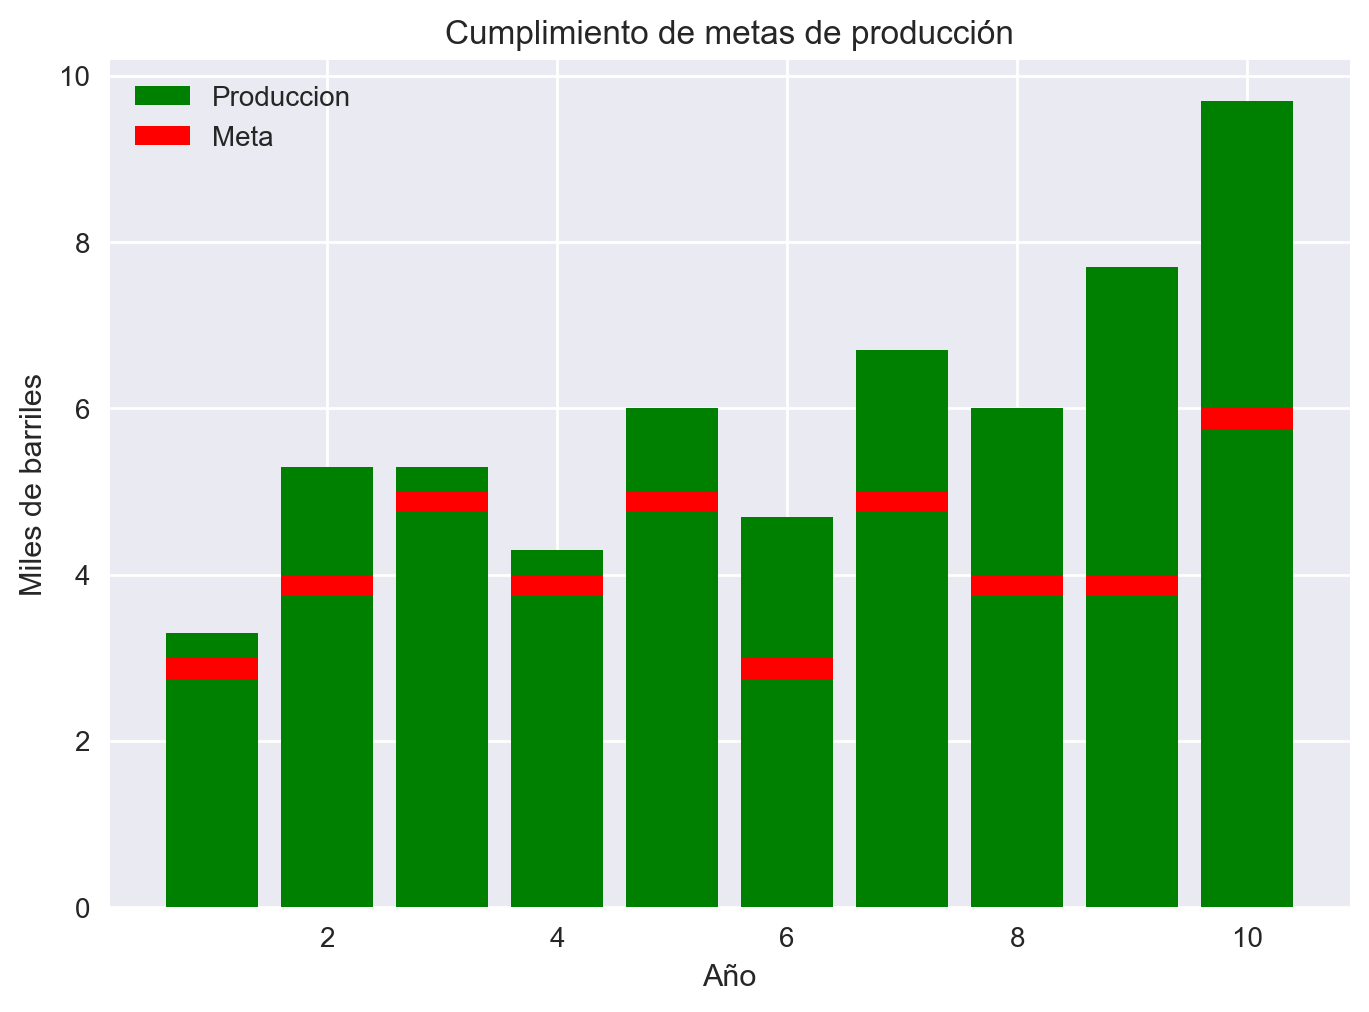

In [17]:
plt.bar(Tiempos, pr.values(), color="green", label="Produccion")
plt.bar(Tiempos, metas.values(), color="red", label="Meta")
plt.bar(Tiempos, [val - 0.25 for val in metas.values()], color="green")

plt.legend()
plt.xlabel("Año")
plt.ylabel("Miles de barriles")
plt.title("Cumplimiento de metas de producción")

plt.show()

**Uso de operarios**

NameError: name 'caso_operarios' is not defined

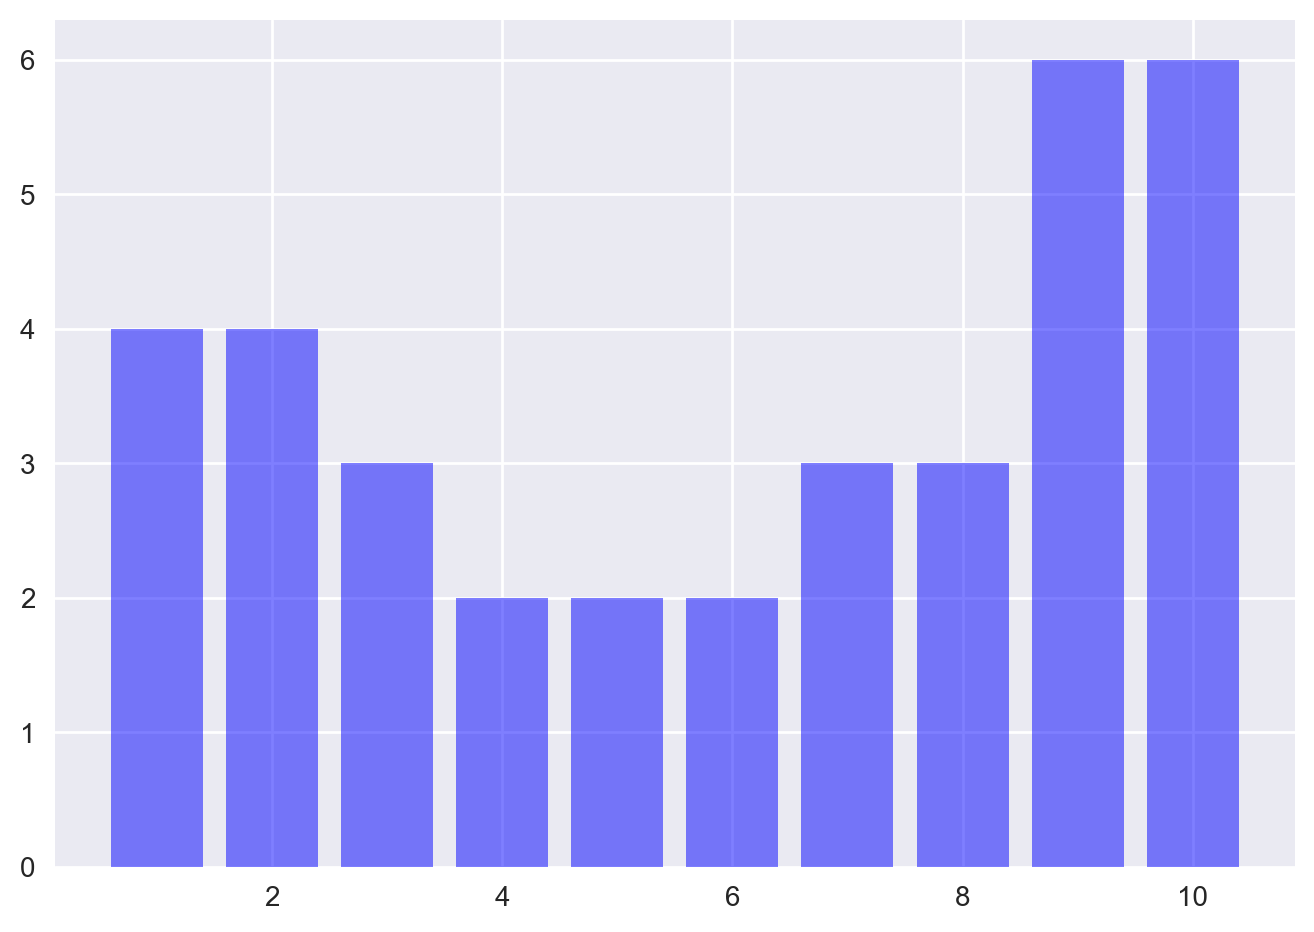

In [18]:
plt.bar(Tiempos, op.values(), color="blue", alpha=0.5, label="Utilizados")
if caso_operarios:
    plt.plot(
        Tiempos,
        list(operariosDisp.values()),
        color="red",
        label="Disponibles",
        linestyle="-",
        marker="o",
    )
else:
    plt.plot(
        range(0, 12),
        [maxOperarios] * (len(Tiempos) + 2),
        color="red",
        label="Disponibles",
    )

plt.legend()
plt.ylim(0, 12)
plt.xlabel("Año")
plt.ylabel("Operarios")
plt.title("Operarios utilizados por año")

plt.show()

**Uso de generadores**

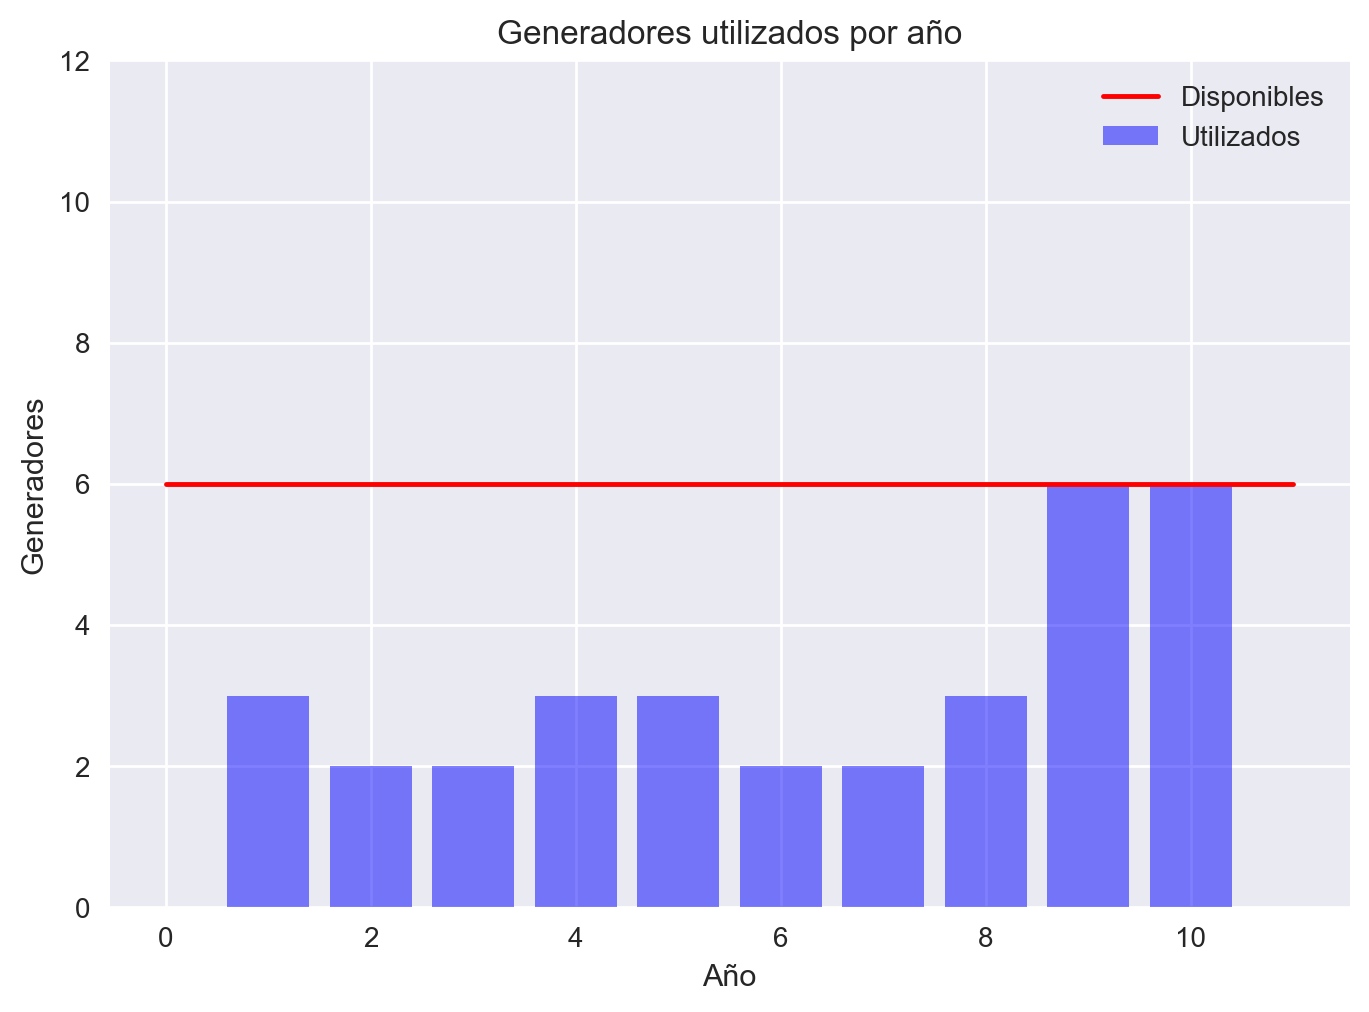

In [19]:
plt.bar(Tiempos, gen.values(), color="blue", alpha=0.5, label="Utilizados")
plt.plot(
    range(0, 12),
    [maxGeneradores] * (len(Tiempos) + 2),
    color="red",
    label="Disponibles",
)

plt.legend()
plt.ylim(0, 12)
plt.xlabel("Año")
plt.ylabel("Generadores")
plt.title("Generadores utilizados por año")

plt.show()

**ANÁLISIS DE RESULTADOS**

Las siguientes celdas son calificables


## Caso 1

*Una vez esté listo el modelo, responder las siguientes preguntas:  ¿Qué pozos deberían ser perforados y en qué periodo teniendo en cuenta estas nuevas condiciones?
¿Cuánto sería la utilidad esperada? ¿Cuánto sería la inversión? ¿Cómo se comporta el uso de recursos a
través del horizonte de planeación?*

##### Qué pozos deberían ser perforados?



In [43]:
# Imprimir producción cada año
matriz = []
for i in Pozos:
    fila = []  # Cada fila contiene la información de un pozo
    for t in Tiempos:
        if lp.value(x[i, t]) > 0:
            fila.append(lp.value(x[i, t]))
        else:
            fila.append("")
    matriz.append(fila)

pd.DataFrame(matriz, index=Pozos, columns=Tiempos)

,1,2,3,4,5,6,7,8,9,10
DELE B-1,,,,,,,,,1.0,
EL MORRO-1,,,,1.0,,,,,,
FLORENA A-5,,1.0,,,,,,,,
FLORENA C-6,1.0,,,,,,,,,
FLORENA N-2,,,,,,,1.0,,,
FLORENA N-4 ST,,,,,,,,,,
FLORENA-T8,,,,,,1.0,,,,
PAUTO J-6,,,,,,,,,,
PAUTO M4,,,,,,,,,1.0,
PAUTO M-5,,,,,,,,,,1.0


Vemos que debemos perforar el poso FLORENA C-6 para el año 1,FLORENA A-5 para el año 2, PAUTO-1	para el año 3,EL MORRO-1-4,VOLCANERA A-1-5,FLORENA-T8-6,FLORENA N-2-7,PAUTO SUR C-2	-8,DELE B-1-9,PAUTO M4-9,PAUTO M-5-10,PAUTO SUR B-1-10

#### Utilidad esperada e inversión


In [44]:
print("\nUtilidad total = $", lp.value(problema.objective))

# Inversión
print(
    "\nInversión total = $",
    sum(costo[i, t] * lp.value(x[i, t]) for i, t in Pozo_x_Tiempo),
    end="\n\n",
)


Utilidad total = $ 1124.0

Inversión total = $ 104.0



Vemos que la utlilidad total es de 1124 y la inversion total es de 104 

### ¿Cómo se comporta el uso de recursos a través del horizonte de planeación?

In [47]:
inversion_dict = {}

for t in Tiempos:
    total_inversion = sum(costo[i, t] * lp.value(x[i, t]) for i in Pozos)
    inversion_dict[t] = total_inversion

inversion_dict


{1: 7.0,
 2: 15.0,
 3: 8.0,
 4: 6.0,
 5: 12.0,
 6: 5.0,
 7: 6.0,
 8: 14.0,
 9: 16.0,
 10: 15.0}

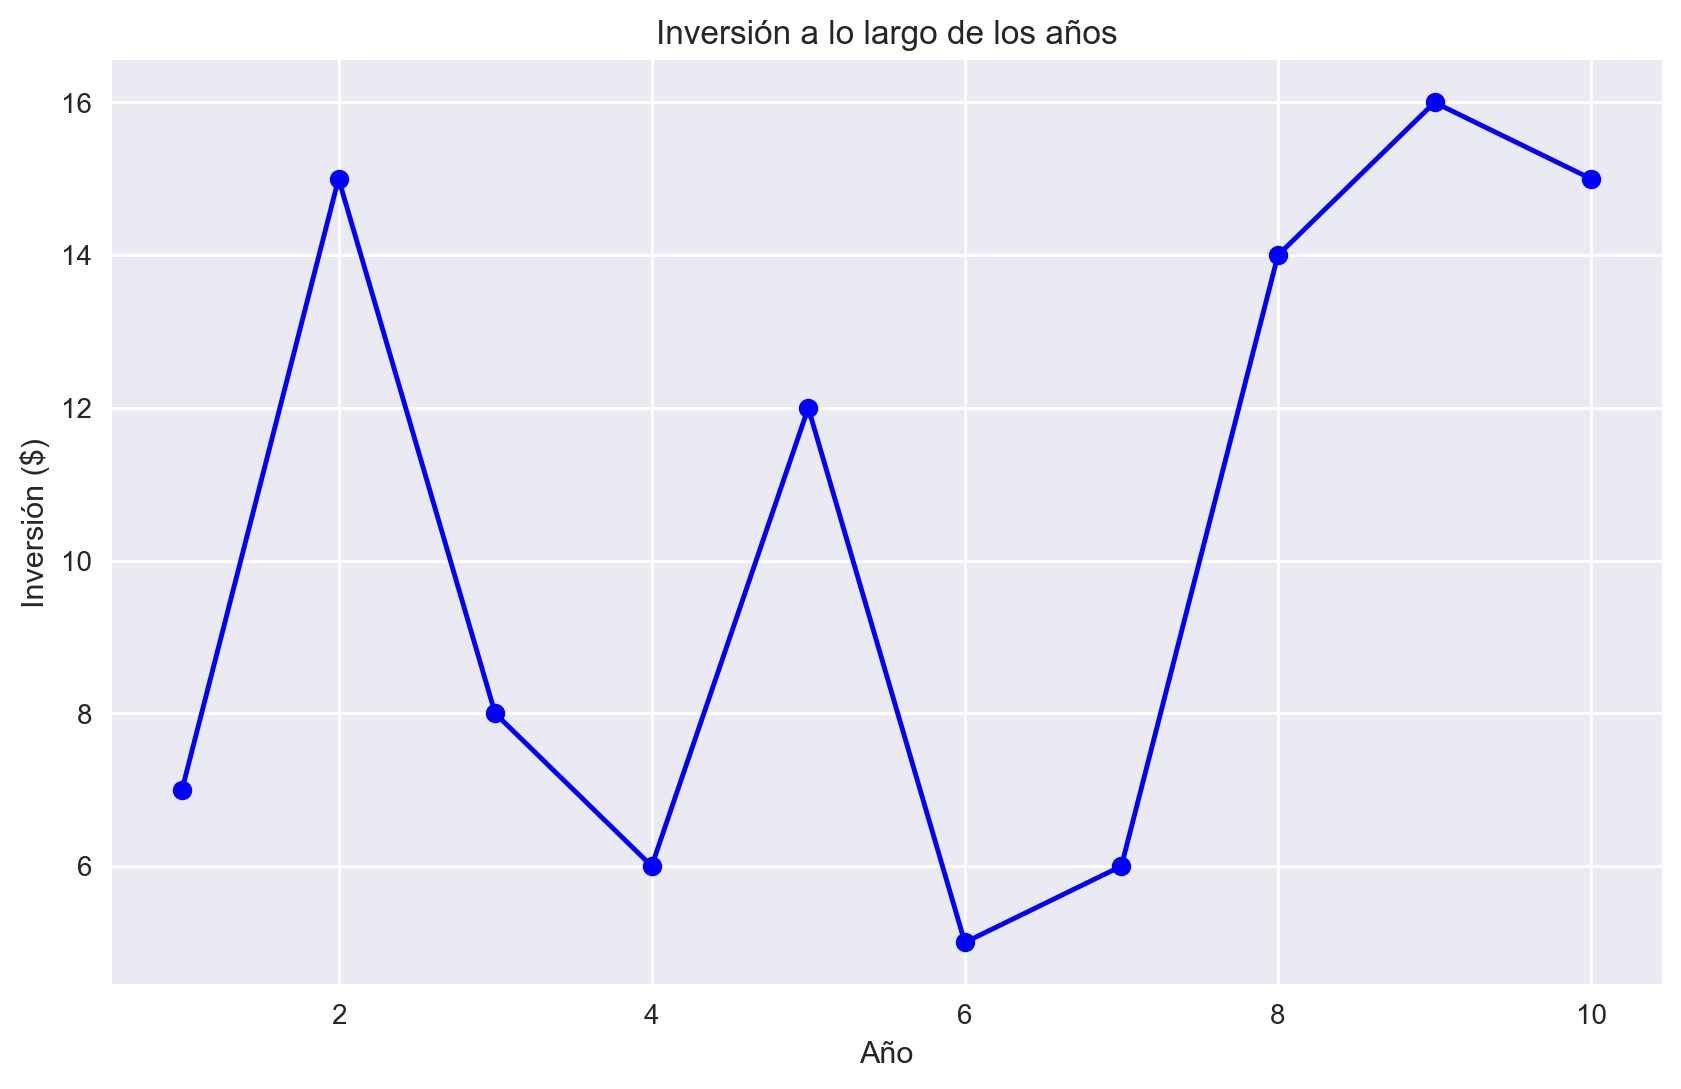

In [48]:
years = list(inversion_dict.keys())
investments = list(inversion_dict.values())

plt.figure(figsize=(10, 6))
plt.plot(years, investments, marker='o', linestyle='-', color='b')
plt.title('Inversión a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Inversión ($)')
plt.grid(True)
plt.show()

Como puedo ver, tengo este diccionario {1: 7.0, 2: 15.0, 3: 8.0, 4: 6.0, 5: 12.0, 6: 5.0, 7: 6.0, 8: 14.0, 9: 16.0, 10: 15.0}. Esto me proporciona información sobre el año y la inversión correspondiente. Es evidente que los dos últimos años son los que experimentan la mayor inversión.

## Caso 2

*Una vez esté listo el modelo, responder las siguientes preguntas:  ¿Cómo cambia la solución respecto al
escenario base?*

**Responder aquí ...**

## Caso 3

*Una vez esté listo el modelo, responder las siguientes preguntas:  ¿qué recomendación le daría al vicepresidente? ¿Por qué?*

**Responder aquí ...**

## Caso 4

*Una vez esté listo el modelo, responder las siguientes preguntas:¿Qué pozos deberían ser perforados y en qué periodo teniendo en cuenta estos cambios en los operarios?
¿Cuánto sería la utilidad esperada? ¿Cuánto sería la inversión? ¿Cómo se comporta el uso de recursos a
través del horizonte de planeación?*

**Responder aquí ...**

## Opcional (0 puntos)

*Una vez esté listo el modelo, puedes cambiar los valores de los parámetros a continuación para verificar como cambian las soluciones y la función objetivo. Para esto debes correr nuevamente las celdas que crean el modelo desde el principio*

In [ ]:
# Parámetros modificables
presupuesto = 120  # Presupuesto máximo
maxProyectos = 12  # Máximo número de proyectos a realizar - restricción ambiental
maxOperarios = 6  # Máximo número de operarios por año
maxGeneradores = 6  # Máximo número de generadores por año

**Reflexión**: ¿Tienen sentido los cambios en las soluciones y el valor de la función objetivo para cada variante del problema? ¿Puedes explicar porqué ocurren estos cambios?

### Fin del laboratorio
---

¡Muchos éxitos!